In [1]:
import gym
import gym_snake
from q_learning_agent import Agent

import matplotlib.pyplot as plt
import numpy as np

gym-snake v0.0.1
Q-learning agent v0.0.4


In [2]:
def observation2state(observation):
    '''
    observation = (X, Y, x, y) => state number
    '''
    d = env.dim # размер поля (6)
    X = observation[0]
    Y = observation[1]
    x = observation[2]
    y = observation[3]
    return y + d*(x + d*(Y + X*d)) 
   
def plot_learning_curves(scores, scores_100):
    eps = [i*10 for i in range(len(scores))]
    plt.plot(eps, scores, label='очки')
    plt.plot(eps, scores_100, label='среднее за 100')
    plt.xlabel('Эпизоды')
    plt.ylabel('Набрано очков')
    plt.grid()
    plt.legend()
    plt.title('Кривая обучения агента Snake-v0')
    plt.show()
    

In [3]:
env = gym.make('Snake-v0')
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01,
              eps_dec=0.9999996, n_actions=4, n_states=env.dim**4, rand=True)

Обучение 

saved Q table for mean score 143.00
episode 0 mean score 143.00 epsilon 1.00
episode 1000 mean score -7.11 epsilon 0.92
episode 2000 mean score 62.50 epsilon 0.85
episode 3000 mean score 60.45 epsilon 0.79
episode 4000 mean score 77.58 epsilon 0.73
episode 5000 mean score 100.63 epsilon 0.67
saved Q table for mean score 143.45
saved Q table for mean score 148.61
saved Q table for mean score 152.67
saved Q table for mean score 153.08
saved Q table for mean score 156.19
saved Q table for mean score 157.11
saved Q table for mean score 164.24
saved Q table for mean score 164.78
saved Q table for mean score 164.81
saved Q table for mean score 166.29
saved Q table for mean score 167.63
saved Q table for mean score 169.60
saved Q table for mean score 170.75
saved Q table for mean score 170.77
saved Q table for mean score 174.47
saved Q table for mean score 177.15
saved Q table for mean score 177.68
episode 6000 mean score 162.27 epsilon 0.62
saved Q table for mean score 179.16
saved Q table f

episode 23000 mean score 626.75 epsilon 0.16
episode 24000 mean score 629.84 epsilon 0.15
episode 25000 mean score 578.05 epsilon 0.14
episode 26000 mean score 694.78 epsilon 0.13
episode 27000 mean score 629.38 epsilon 0.12
episode 28000 mean score 698.62 epsilon 0.11
episode 29000 mean score 716.86 epsilon 0.10
episode 30000 mean score 722.74 epsilon 0.09
episode 31000 mean score 626.82 epsilon 0.08
episode 32000 mean score 671.12 epsilon 0.08
episode 33000 mean score 699.35 epsilon 0.07
saved Q table for mean score 745.72
episode 34000 mean score 720.50 epsilon 0.07
episode 35000 mean score 644.66 epsilon 0.06
episode 36000 mean score 578.47 epsilon 0.06
episode 37000 mean score 615.29 epsilon 0.05
episode 38000 mean score 650.06 epsilon 0.05
episode 39000 mean score 607.76 epsilon 0.04
episode 40000 mean score 606.47 epsilon 0.04
episode 41000 mean score 588.82 epsilon 0.04
episode 42000 mean score 594.94 epsilon 0.03
episode 43000 mean score 602.19 epsilon 0.03
episode 44000 mean 

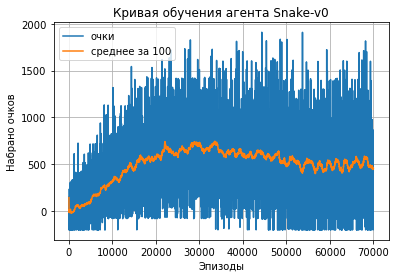

Wall time: 25min 7s


In [11]:
%%time

scores = []
scores_100 = []
best_score_sofar = 0.

n_games = 70000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        state = observation2state(observation)
        action = agent.choose_action(state)
        observation_, reward, done, info = env.step(action)
        state_ = observation2state(observation_)
        agent.learn(state, action, reward, state_)
        score += reward
        observation = observation_
    if i % 10 == 0:
        scores.append(score)
        mean_score = np.mean(scores[-100:])
        scores_100.append(mean_score)
        if mean_score > best_score_sofar:
            best_score_sofar = mean_score
            agent.save('best' % mean_score)
            print("saved Q table for mean score %.2f" % mean_score)
        if i % 1000 == 0:
            print('episode %d mean score %.2f epsilon %.2f' % (i, mean_score, agent.epsilon))
plot_learning_curves(scores, scores_100)
agent.save()

![Обучение](learning-snake.png)

Тестирование

In [4]:

agent.load()

observation = env.reset()
print(observation)
done = False
score = 0
steps = 0
prev_action = 100
prev_state = None
while not done:
    env.render()
    state = observation2state(observation)
    if state == prev_state: # значит мы сделали запрещенный ход прошлый раз
        while action == prev_action:
            action = np.random.choice([i for i in range(4)]) # выбираем случайных ход не совпадающий с предыдущим
    else:
        action = agent.choose_action(state)
        while abs(action - prev_action) == 2: # если новый ход является противоположностью предыдущего, 
            action = np.random.choice([i for i in range(4)]) # выбираем случайных ход
    observation, reward, done, info = env.step(action)
    prev_action = action
    prev_state = state
    score += reward
    steps += 1
    print("step %d action %d => %d, total: %d" % (steps, action, reward, score))
print("End of episode")

(0, 2, 1, 3)
. . O . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 1 action 1 => -2, total: -2
. . O . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 2 action 0 => -1, total: -3
. O . . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 3 action 1 => -2, total: -5
. O . . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 4 action 0 => -1, total: -6
O . . . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 5 action 3 => -1, total: -7
. . . . . . 
O . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 6 action 2 => -1, total: -8
. . . . . . 
. O . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 7 action 1 => -1, total: -9
. O . . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 8 action 2 => -1, total: -10
. . O . . . 
. . . A . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 9 action 3 => -

. . . . . . 
step 104 action 3 => -1, total: 182
o o . . . . 
O o . . A . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 105 action 3 => -1, total: 181
o o . . . . 
o . . . A . 
O . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 106 action 0 => -2, total: 179
o o . . . . 
o . . . A . 
O . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
step 107 action 3 => -1, total: 178
o . . . . . 
o . . . A . 
o . . . . . 
O . . . . . 
. . . . . . 
. . . . . . 
step 108 action 2 => -1, total: 177
. . . . . . 
o . . . A . 
o . . . . . 
o O . . . . 
. . . . . . 
. . . . . . 
step 109 action 1 => -1, total: 176
. . . . . . 
. . . . A . 
o O . . . . 
o o . . . . 
. . . . . . 
. . . . . . 
step 110 action 0 => -2, total: 174
. . . . . . 
. . . . A . 
o O . . . . 
o o . . . . 
. . . . . . 
. . . . . . 
step 111 action 1 => -1, total: 173
. . . . . . 
. O . . A . 
. o . . . . 
o o . . . . 
. . . . . . 
. . . . . . 
step 112 action 2 => -1, total: 172
. . . . . . 
. o O . A . 
. o . . . . 


Можно заметить такую проблему: алгоритм иногда выдает ход "назад", поскольку мы не учитываем в пространстве состояний расположение тела змеи (это бы значительно усложнило и увеличило пространство). Поэтому надо как то усовершенствовать алгоритм.
1. Расширить пространство состояний - учитывать направление последнего хода;
2. Выдавать не лучший ход (который может оказаться неразрешенным в конкретной ситуации) а упорядоченный набор вариантов ходов (от лучшего к худшему) 

Тестирование обученного агента, набираем статистику

In [20]:
agent.load('best.npy') # загружаем сохраненную Q-таблицу

done = False
render = False

n_games = 10000
total_score = 0

for i in range(n_games):
    score = 0
    steps = 0
    prev_action = 100
    prev_state = None
    observation = env.reset()
    done = False
    while not done:
        if render:
            env.render()
        state = observation2state(observation)
        if state == prev_state: # значит мы сделали запрещенный ход прошлый раз
            while action == prev_action:
                action = np.random.choice([i for i in range(4)]) # выбираем случайных ход не совпадающий с предыдущим
        else:
            action = agent.choose_action(state)
            while abs(action - prev_action) == 2: # если новый ход является противоположностью предыдущего, 
                action = np.random.choice([i for i in range(4)]) # выбираем случайных ход
        observation, reward, done, info = env.step(action)
        prev_action = action
        prev_state = state
        score += reward
        steps += 1
#         print("step %d action %d => %d, total: %d" % (steps, action, reward, score))
    if (i+1) % 100 == 0:
        print("End of episode %d, score=%d" % (i+1, score))
    total_score += score
print("Average score=%.3f" % (total_score/n_games))

End of episode 100, score=156
End of episode 200, score=162
End of episode 300, score=152
End of episode 400, score=127
End of episode 500, score=339
End of episode 600, score=32
End of episode 700, score=-42
End of episode 800, score=234
End of episode 900, score=130
End of episode 1000, score=-142
End of episode 1100, score=-61
End of episode 1200, score=452
End of episode 1300, score=159
End of episode 1400, score=159
End of episode 1500, score=-55
End of episode 1600, score=-201
End of episode 1700, score=28
End of episode 1800, score=50
End of episode 1900, score=48
End of episode 2000, score=164
End of episode 2100, score=46
End of episode 2200, score=8
End of episode 2300, score=244
End of episode 2400, score=120
End of episode 2500, score=141
End of episode 2600, score=113
End of episode 2700, score=-56
End of episode 2800, score=343
End of episode 2900, score=-157
End of episode 3000, score=133
End of episode 3100, score=520
End of episode 3200, score=45
End of episode 3300, s